# Support Vector Machines

The SVM model converts an optimization problem with the same dimensionality as number of features to an optimization problem with dimensionality equal to the number of support vectors which determine the optimal hyperplane dividing the classes. The reason why we are able to reformulate the optimization problem to our advantage is that the problem satisfies certain conditions such that we can make the assumption that the solution to the primal and dual problems is the same. The dual problem is a maximization with respect to the values of $\alpha^{t}$ (scalars), rather than with respect to the values of $\mathbf{x}^{t}$ (vectors, possibly of high dimensionality). Solving the dual problem finds an optimal solution by examining the constraint values which change the optimal solution the most.

We can represent the data points as a linear combination of basis functions which are nonlinear and may have many dimensions. We map a $d$-dimensional $\mathbf{x}$ space to a $k$-dimensional $\mathbf{z}$ space, typically with $k >> d$ and potentially $k >> N$. The discriminant becomes
$$
g\of{\mathbf{x}} = \mathbf{w}^{T}\mathbf{\phi}\of{\mathbf{x}}, \quad \mathbf{z} = \mathbf{\phi}\of{\mathbf{x}}.
$$

The inner product of basis functions inside the dual problem, $\mathbf{\phi}\of{\mathbf{x}^{t}}^{T}\mathbf{\phi}\of{\mathbf{x}^{s}}$ can be replaced with a kernel function $K\of{\mathbf{x}^{t}, \mathbf{x}^{s}}$, eliminating the need for mapping the instances to the $\mathbf{z}$-space. Kernels can be considered to be measures of similarity, with larger values corresponding to greater similarity between the two input vectors. Nonlinear basis functions are also useful for problems which are not linearly separable in the original space, because the data points may be separable once they are converted to the nonlinear space.  In general, different types of kernel functions may have better results if they are better able to fit the shape of the discrimination surface of a particular dataset or application.

In the cases tested here, the number of features in the original space is small, and the decision surfaces are relatively simple and can be fit reasonably well with simpler basis functions, so the difference between using linear or nonlinear basis functions is less significant.

When the label values $r^{t} \in \{-1, 1\}$, the distance of a given data point $\mathbf{x}^{t}$ to the discriminant is
$$
\frac{r^{t}\left(\mathbf{w}^{T}\mathbf{x}^{t} + w_{0}\right)}{\norm{\mathbf{w}}}.
$$
To make this value as large as possible, we want to make $\norm{\mathbf{w}}$ as small as possible, which we can form as a standard quadratic optimization problem:
$$
\min_{\mathbf{w}}\frac{1}{2}\norm{\mathbf{w}}^{2}, \quad \text{s.t.} \quad r^{t}\left(\mathbf{w}^{T}\mathbf{x}^{t} + w_{0}\right) \geq +1, \quad \forall t.
$$
We are minimizing the value of $\norm{\mathbf{w}}$ while still ensuring that its value satisfies the definition of the hyperplane, which is a function of the data points. We want the distance from the data points to the discriminant hyperplane to be at least some value $\rho$. The distance of $1$ is used to exclude solutions which simply scale the vector $\mathbf{w}$.

We can introduce slack variables $\xi^{t}$ into the constraint, which has the effect of allowing for solutions which define hyperplanes that do not precisely satisfy the constraint $r^{t}\left(\mathbf{w}^{T}\mathbf{x}^{t} + w_{0}\right) \geq +1 \forall t$ required for a discriminant which is correct for all data points, but including $\xi^{t}$ in the optimization function ensures that the error produced by the hyperplane solution is as small as possible. In this formulation, the $L^{2}$ norm of $\mathbf{w}$ is used as the main value to be minimized, which is similar to the effect using the $L^{2}$ norm of the weight vector as a regularization term added to the sum of least squares in previous models, but rather than using the scaling factor $C$ to change how much $\norm{\mathbf{w}}$ affects the optimization, here we are optimizing directly for a minimal size of $\mathbf{w}$. When we introduce the variables $\xi^{t}$, which describe the distance of points from the margin, and we use the scaling factor $C$ to change how much the sum of the distances of points from the margin affects the optimization - so in a way this technique is opposite to the ones we've used so far.

In [1]:
import numpy as np
np.set_printoptions(precision=3)
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm
%matplotlib notebook

from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs

from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC, LinearSVC

 $\newcommand{\braket}[2]{\left\langle{#1}\mid{#2}\right\rangle}$
 $\newcommand{\of}[1]{\left({#1}\right)}$
 $\newcommand{\norm}[1]{\left\lVert{#1}\right\rVert}$

In [2]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

### 1) Train the SVM model on the complete Iris data set using all of the features at once.

In [3]:
iris = load_iris()
X = iris.data
Xs = scale(iris.data)
y = iris.target

iris_df = pd.DataFrame(Xs, columns=['Sepal length', 'Sepal width', 'Petal length', 'Petal width'])
s = pd.Series(y, dtype="category")
s.cat.categories = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
iris_df["Class"] = s
iris_df['y'] = y

labels = [['Sepal length', 'Sepal width', 'Petal length', 'Petal width']]
features = [iris_df.loc[:, labels[i]] for i in range(1)]

In [4]:
C = 1.0
X2 = X[:, :2]
X4 = X

kernels = (SVC(kernel='linear', C=C),
          SVC(kernel='poly', degree=2, gamma='auto', C=C),
          SVC(kernel='poly', degree=4, gamma='auto', C=C),
          SVC(kernel='rbf', gamma=0.7, C=C))
titles = ['Linear kernel',
          'Polynomial kernel (degree 2)',
          'Polynomial kernel (degree 4)',
          'RBF kernel']

print('2 features:\n')
for clf, title in zip(kernels, titles):
    m = [clf.fit(X2, y) for clf in kernels]
    print(title, 'score = {:.2%}'.format(clf.score(X2, y)))
    
print('\n4 features:\n')
for clf, title in zip(kernels, titles):
    m = [clf.fit(X4, y) for clf in kernels]
    print(title, 'score = {:.2%}'.format(clf.score(X4, y)))

2 features:

Linear kernel score = 82.00%
Polynomial kernel (degree 2) score = 82.00%
Polynomial kernel (degree 4) score = 80.67%
RBF kernel score = 82.67%

4 features:

Linear kernel score = 99.33%
Polynomial kernel (degree 2) score = 98.67%
Polynomial kernel (degree 4) score = 99.33%
RBF kernel score = 98.00%


The plots below show the discriminant function for binary classification between classes. In the first case, the classes are linearly separable, so a correct hyperplane can be found. Regularization causes some points to fall inside the margin. In the second case, the classes are not linearly separable, so many points fall inside the margin.

<IPython.core.display.Javascript object>


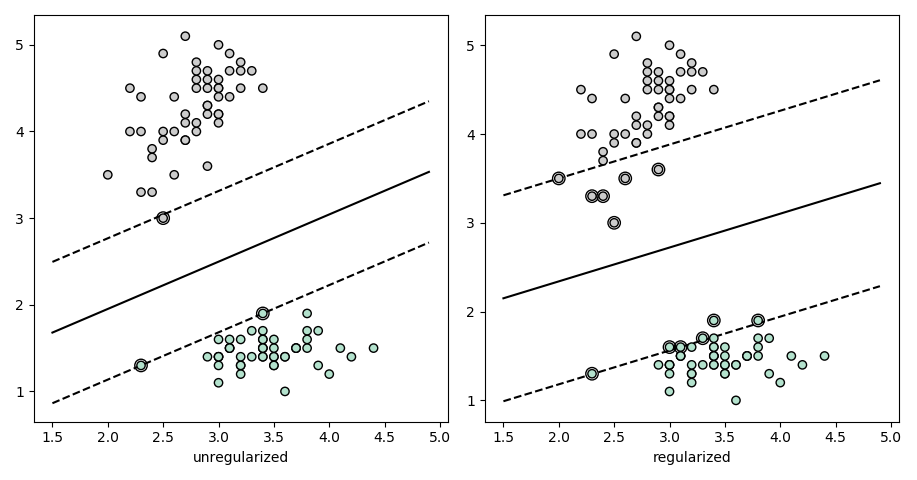

<IPython.core.display.Javascript object>


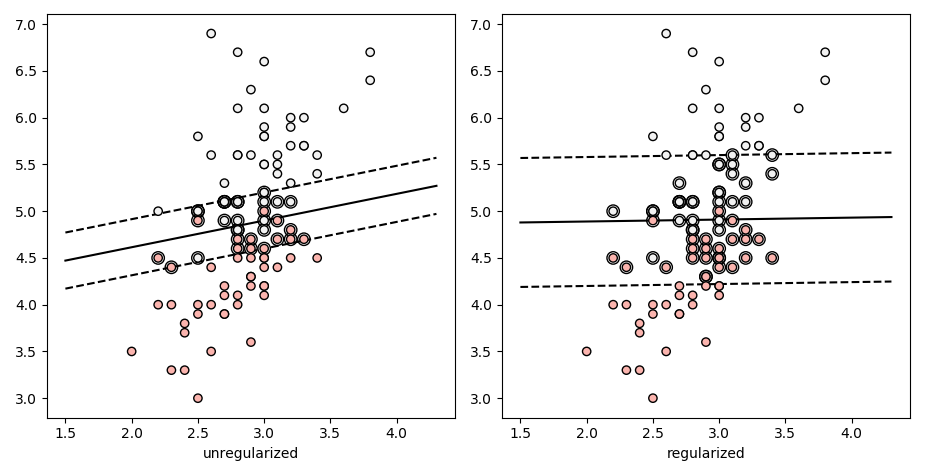

In [6]:
def plot_points(X, y, colors):
    names = ['unregularized', 'regularized']
    C_val = [1, 0.1]
    f, axes = plt.subplots(1, len(names))

    for name, penalty, ax in zip(names, C_val, axes.flatten()):

        model = SVC(kernel='linear', C=penalty)
        model.fit(X, y)

        x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
        y_min, y_max = y.min() - 0.5, y.max() + 0.5
    
        # compute decision hyperplane
        w = model.coef_[0]
        a = -w[0] / w[1]
        xx = np.linspace(x_min, x_max, 30)
        yy = a * xx - (model.intercept_[0]) / w[1]

        # plot the parallels to the separating hyperplane which pass through the
        # support vectors (the margins)
        margin = 1 / np.sqrt(np.sum(model.coef_ ** 2))
        yy_down = yy - np.sqrt(1 + a ** 2) * margin
        yy_up = yy + np.sqrt(1 + a ** 2) * margin

        ax.plot(xx, yy, 'k-')
        ax.plot(xx, yy_down, 'k--')
        ax.plot(xx, yy_up, 'k--')

        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=80,
                    facecolors='none', zorder=10, edgecolors='k')
        ax.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=colors,
                    edgecolors='k')
        ax.set_xlabel(name)
        
        f.set_tight_layout(True)

    f.show()
    
plot_points(X[:100, [1, 2]], y[:100], plt.cm.Pastel2)
plot_points(X[50:, [1, 2]], y[50:], plt.cm.Pastel1)

### 2) Run the SVM model at least four times using a different kernel each time.

#### a. Compare the results for each of the kernels.

2 features:

Linear score = 82.00%
Polynomial (deg 2) score = 82.00%
Polynomial (deg 4) score = 80.67%
RBF score = 82.67%

4 features:

Linear score = 99.33%
Polynomial (deg 2) score = 98.67%
Polynomial (deg 4) score = 99.33%
RBF score = 98.00%


<IPython.core.display.Javascript object>


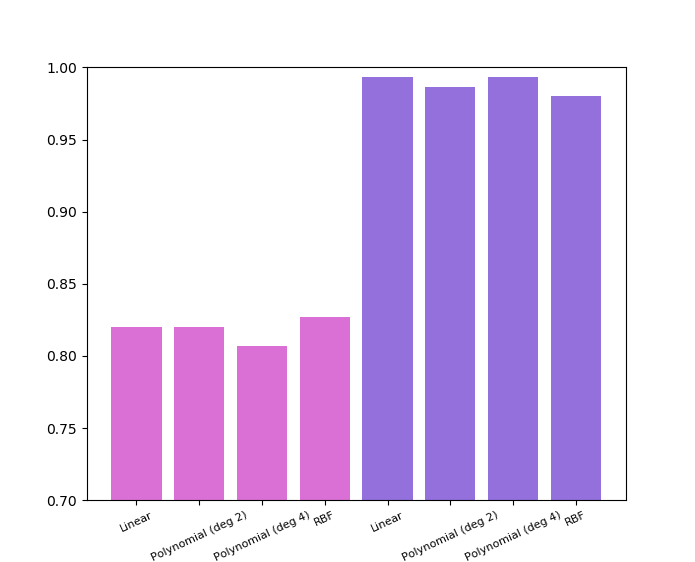

In [7]:
C = 1.0
X2 = X[:, :2]
X4 = X

kernels = (SVC(kernel='linear', C=C),
          SVC(kernel='poly', degree=2, gamma='auto', C=C),
          SVC(kernel='poly', degree=4, gamma='auto', C=C),
          SVC(kernel='rbf', gamma=0.7, C=C))
titles = ['Linear',
          'Polynomial (deg 2)',
          'Polynomial (deg 4)',
          'RBF']

print('2 features:\n')
scores1 = []
for clf, title in zip(kernels, titles):
    m = [clf.fit(X2, y) for clf in kernels]
    print(title, 'score = {:.2%}'.format(clf.score(X2, y)))
    scores1.append(clf.score(X2, y))
    
scores2 = []
print('\n4 features:\n')
for clf, title in zip(kernels, titles):
    m = [clf.fit(X4, y) for clf in kernels]
    print(title, 'score = {:.2%}'.format(clf.score(X4, y)))
    scores2.append(clf.score(X4, y))
    
fig_, ax_ = plt.subplots()
ax_.bar(np.array([1, 2, 3, 4]), scores1, color='orchid', label='Two Features')
ax_.bar(np.array([5, 6, 7, 8]), scores2, color='mediumpurple', label='Four Features')
ax_.set_ylim(0.7, 1.0)
ax_.set_xticks([1, 2, 3, 4, 5, 6, 7, 8])
ax_.tick_params(axis='x', labelrotation=25)
ax_.set_xticklabels(titles + titles, {'fontsize':8})
fig_.show()

#### b. Plot the results (including the decision boundaries) using two features at a time (since you’re limited to two dimensions in plotting) for three of the cases (i.e., for three of the kernels).   Note that you need to fit the model using all four of the features but then plot the results using only two of the features.

In order to plot the model trained on all four features, the prediction function is applied to points which have zero values for two out of the four features (effectively showing the results of classifying data points which are only two-dimensional).

<IPython.core.display.Javascript object>


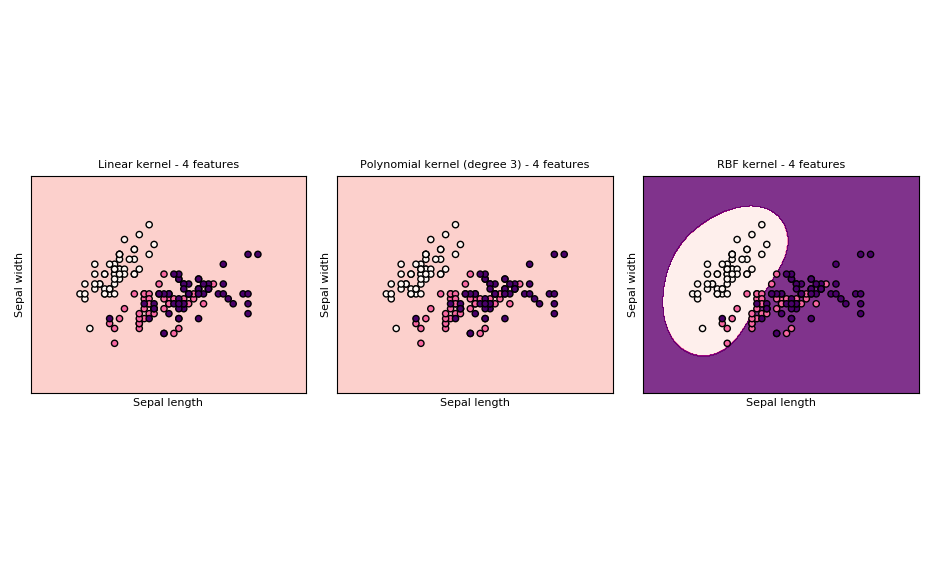

Score -  Linear kernel - 4 features : 99.33%
Score -  Polynomial kernel (degree 3) - 4 features : 98.00%
Score -  RBF kernel - 4 features : 98.00%


In [8]:
def plot_decision_surface(X, models, titles, axlabels, aspect):
    models = [clf.fit(X, y) for clf in models]
    fig, sub = plt.subplots(1, 3)
    fig.set_tight_layout(True)
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    zeros = np.zeros_like(xx)
    shape = xx.shape
    
    for clf, title, ax in zip(models, titles, sub.flatten()):
        if X.shape[1] == 4:
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel(), zeros.ravel(), zeros.ravel()])
        elif X.shape[1] == 2:
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(shape)

        ax.contourf(xx, yy, Z, cmap=plt.cm.RdPu, alpha=0.8)
        ax.scatter(X0, X1, c=y, cmap=plt.cm.RdPu, s=20, edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xlabel(axlabels[0], fontsize=8)
        ax.set_ylabel(axlabels[1], fontsize=8)
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title, fontsize=8)
        ax.set_aspect(aspect)
        fig.set_tight_layout(True)
        print("Score - ", title, ":", '{:.2%}'.format(clf.score(X, y)))

    fig.show()

C = 1.0
X2 = X[:, :2]
X4 = X
models = (SVC(kernel='linear', C=C),
          SVC(kernel='poly', degree=3, gamma='auto', C=C),
          SVC(kernel='rbf', gamma=0.7, C=C))
titles1 = ['Linear kernel - 2 features',
          'Polynomial kernel (degree 3) - 2 features',
          'RBF kernel - 2 features']
titles2 = ['Linear kernel - 4 features',
          'Polynomial kernel (degree 3) - 4 features',
          'RBF kernel - 4 features']

plot_decision_surface(X4, models, titles2, ['Sepal length', 'Sepal width'], 'equal')

Below are several examples of the decision surface resulting from models trained on two features.

<IPython.core.display.Javascript object>


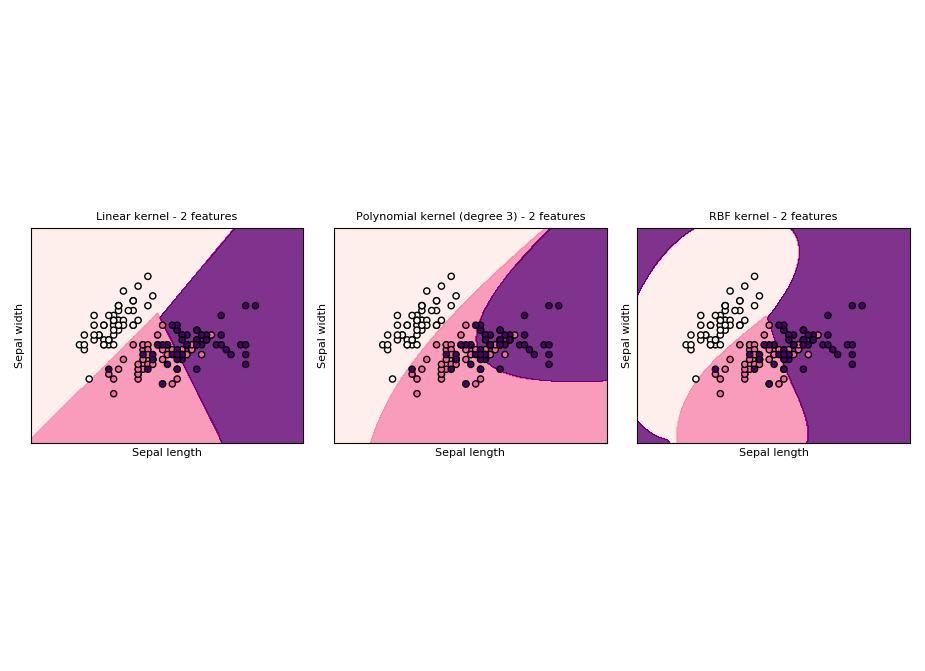

Score -  Linear kernel - 2 features : 82.00%
Score -  Polynomial kernel (degree 3) - 2 features : 81.33%
Score -  RBF kernel - 2 features : 82.67%


In [15]:
plot_decision_surface(X[:, :2], models, titles1, ['Sepal length', 'Sepal width'], 'equal')

<IPython.core.display.Javascript object>


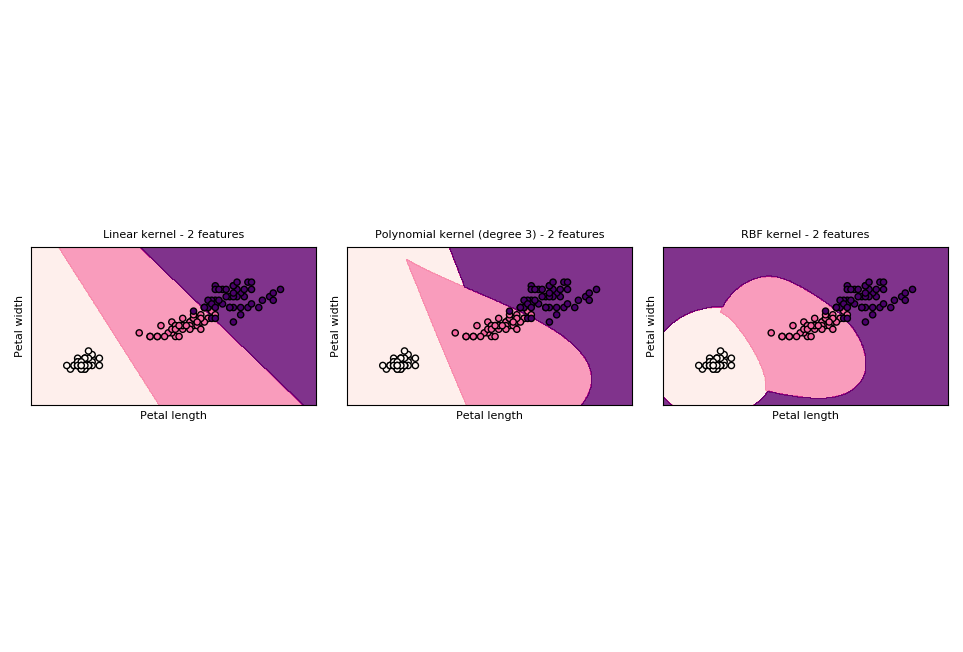

Score -  Linear kernel - 2 features : 96.67%
Score -  Polynomial kernel (degree 3) - 2 features : 96.00%
Score -  RBF kernel - 2 features : 96.67%


In [9]:
plot_decision_surface(X[:, [2, 3]], models, titles1, ['Petal length', 'Petal width'], 'equal')

<IPython.core.display.Javascript object>


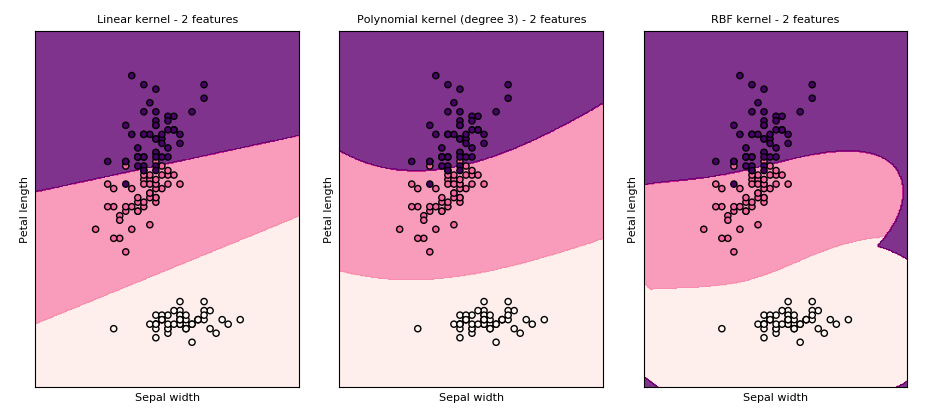

Score -  Linear kernel - 2 features : 96.00%
Score -  Polynomial kernel (degree 3) - 2 features : 95.33%
Score -  RBF kernel - 2 features : 95.33%


In [10]:
plot_decision_surface(X[:, [1, 2]], models, titles1, ['Sepal width', 'Petal length'], 0.75)

<IPython.core.display.Javascript object>


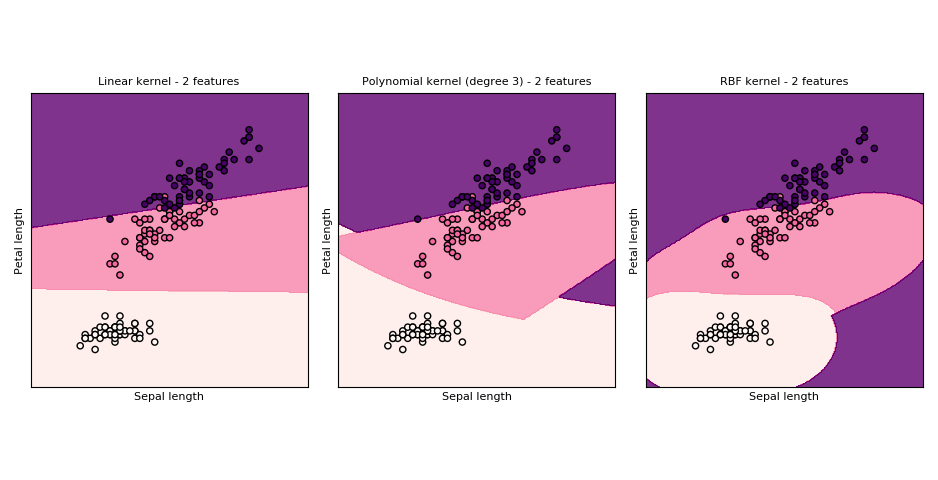

Score -  Linear kernel - 2 features : 95.33%
Score -  Polynomial kernel (degree 3) - 2 features : 96.67%
Score -  RBF kernel - 2 features : 96.00%


In [11]:
plot_decision_surface(X[:, [0, 2]], models, titles1, ['Sepal length', 'Petal length'], 0.75)